<a href="https://colab.research.google.com/github/richardp123456/PersonalProjects/blob/main/Pilz_Richard_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1**

##**1. Background**

###What is the Problem?

The problem at hand is to predict the Manufacturer's Suggested Retail Price (MSRP) of automobiles based on various attributes of the car, such as engine specifications, vehicle type, fuel type, and other features. This can help understand the factors that influence car and rental prices and assist in making informed decisions when purchasing a vehicle.

###Who Might Be Interested in This Problem and Why?

1. Automobile Manufacturers would be interested in this problem to optimize their pricing strategy and position their vehicles competitively in the market.

2. Dealerships and Resellers need an accurate MSRP prediction, which can help dealerships and resellers set competitive and realistic prices for their inventory, ensuring profitability while attracting customers.

3. Knowledge of predicted prices can help potential buyers make informed decisions, ensuring they pay a fair price based on the car's features.

###What Does the Data Look Like?

The dataset consists of over 10,000 records of individual cars, each with features such as Make, Model, Year, Engine Horse Power, number of Cylinders, Transmission Type, Driven Wheels, Vehicle Size, Vehicle Style.
The target variable is MSRP, representing the suggested retail price of each car.
There are a mix of numerical features (like Engine HP, highway MPG, and Popularity) and categorical features (like Driven Wheels and Vehicle Size) that provide detailed information about each car.
The data requires some preprocessing, including handling missing values, encoding categorical variables, and standardizing numerical values to ensure consistency and compatibility with predictive models.

##**2. EDA**
***See code below***

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
d

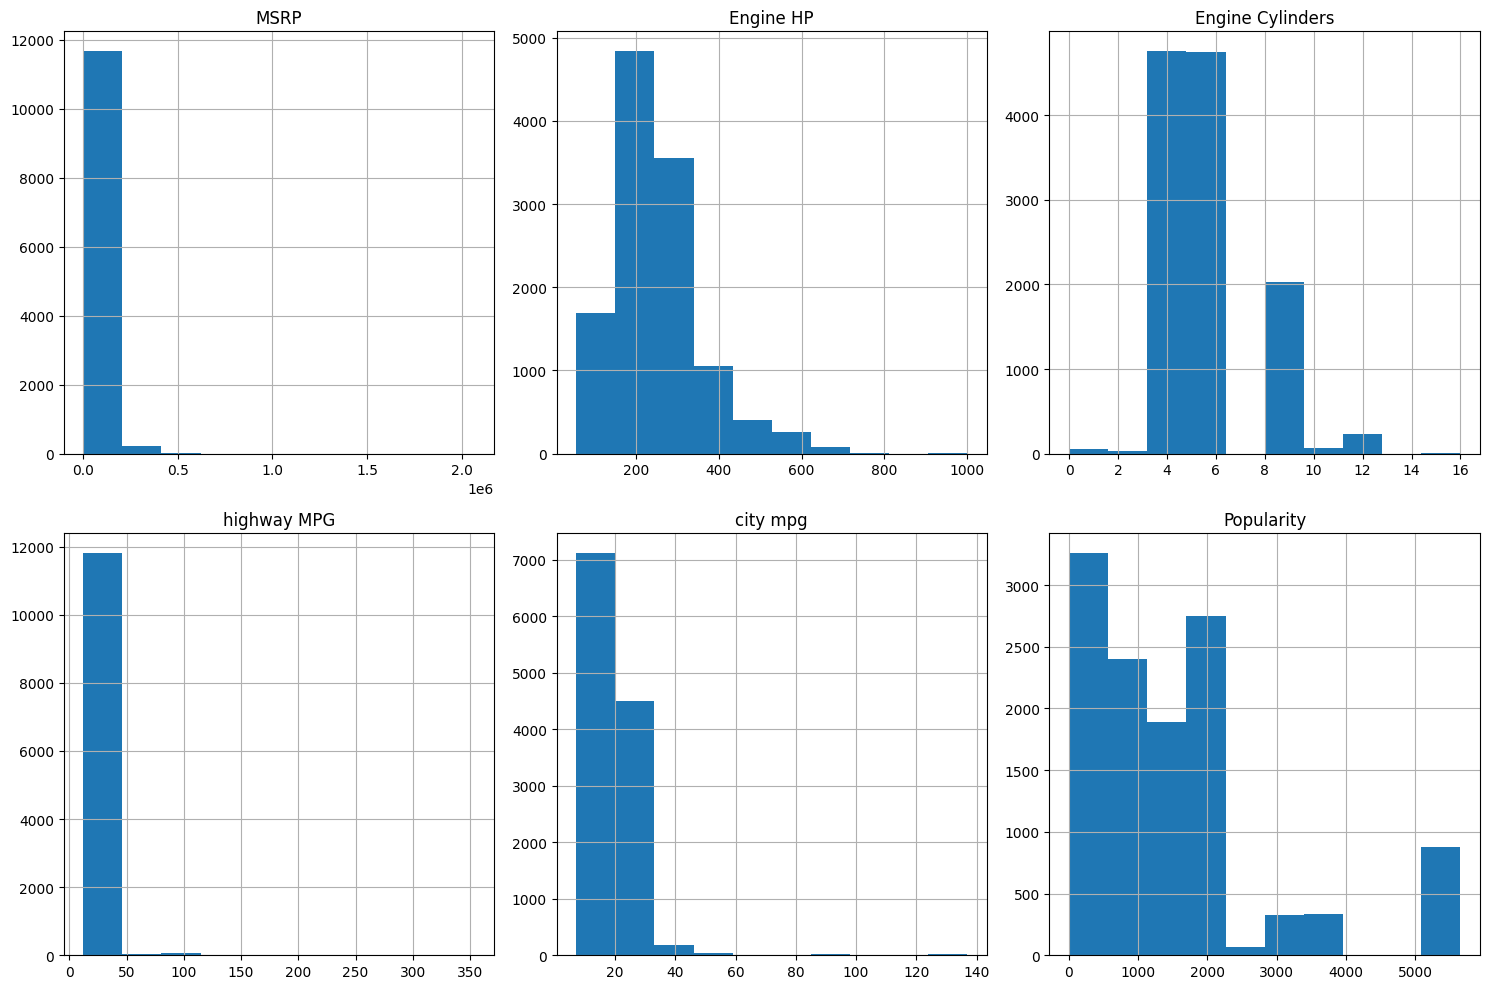

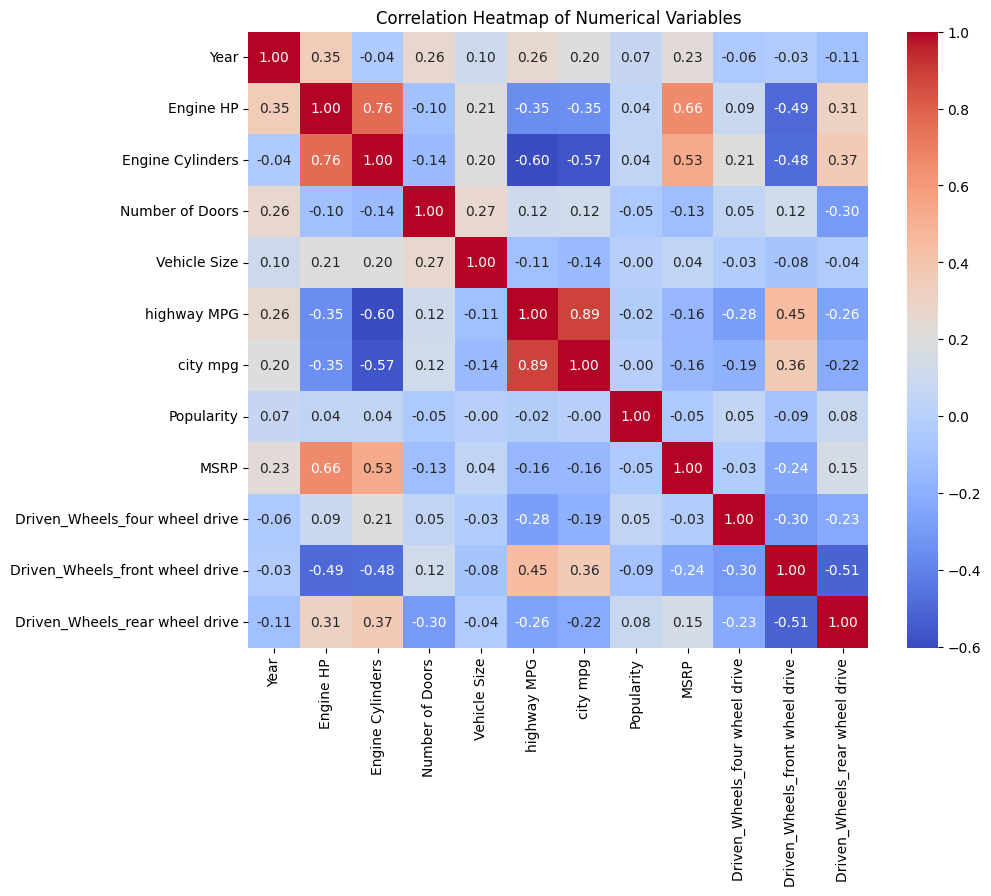

Training data shape: (9531, 11)
Testing data shape: (2383, 11)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
car_data = pd.read_csv('/content/car_pricing.csv')

# Display initial data info and a brief summary
print("Initial Data Information:")
car_data.info()
print("\nSummary Statistics:")
print(car_data.describe())

# Part 1: Data Cleaning and Conversion
# Handle missing values by using SimpleImputer (e.g., fill NaN with mean for numerical, mode for categorical)
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Filling missing values for numerical features
car_data[['Engine HP', 'Engine Cylinders', 'Number of Doors']] = num_imputer.fit_transform(
    car_data[['Engine HP', 'Engine Cylinders', 'Number of Doors']]
)

# Drop 'Market Category' due to high number of missing values or we can impute if needed
car_data.drop(columns=['Market Category'], inplace=True)

# Encoding categorical variables
# One-hot encode 'Driven_Wheels' and drop the original column
car_data = pd.get_dummies(car_data, columns=['Driven_Wheels'], drop_first=True)

# Ordinal encoding for 'Vehicle Size'
ordinal_encoder = OrdinalEncoder()
car_data['Vehicle Size'] = ordinal_encoder.fit_transform(car_data[['Vehicle Size']])

# Drop any unnecessary categorical columns
car_data.drop(columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Vehicle Style'], inplace=True)

# Checking for any remaining missing values
print("\nRemaining Missing Values:")
print(car_data.isnull().sum())

# Part 2: Exploratory Data Analysis (EDA)
# Visualize distributions of key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
car_data[['MSRP', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']].hist(ax=axes)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(car_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Train/Test Split
# Separate features and target variable
X = car_data.drop(columns='MSRP')
y = car_data['MSRP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



#**Part 2. Training the Models**



**Simple Regression Models**

Selection Criteria:
Given that MSRP is the target variable, I prioritized features that intuitively correlate with car price as below.


*   ***Engine HP***: Generally, cars with higher horsepower tend to be more expensive due to the performance and engineering costs.
*   ***highway MPG***: Fuel efficiency can affect a vehicle’s price, though the correlation might vary across car types.

*   ***Popularity***: Although less intuitive, Popularity may capture consumer demand or brand perception, which might have some impact on MSRP.



"np.log()" is applied to account for any none linear relationships between the explanatroy variables, in this case Engine HP and the MRSP.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to train and evaluate a model
def evaluate_simple_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2, model.coef_[0]

# Prepare a list of features for single-variable regression
features = ['Engine HP', 'highway MPG', 'Popularity']
results = {}

# Train simple regression models with each feature
for feature in features:
    X_train_simple = X_train[[feature]]
    X_test_simple = X_test[[feature]]
    mae, mse, r2, coef = evaluate_simple_regression(X_train_simple, X_test_simple, y_train, y_test)
    results[feature] = {'MAE': mae, 'MSE': mse, 'R2': r2, 'Coefficient': coef}

# Log transformation for one of the features (e.g., Engine HP)
X_train_log = np.log(X_train[['Engine HP']])
X_test_log = np.log(X_test[['Engine HP']])
mae_log, mse_log, r2_log, coef_log = evaluate_simple_regression(X_train_log, X_test_log, y_train, y_test)
results['Log(Engine HP)'] = {'MAE': mae_log, 'MSE': mse_log, 'R2': r2_log, 'Coefficient': coef_log}

# Display results
results

# Convert results dictionary to a DataFrame for better display
results_df = pd.DataFrame(results).T  # Transpose to have features as rows to make comparison easier

# Rename columns for clarity
results_df.columns = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-Squared (R2)', 'Coefficient']

# Display the results
print("Model Performance Metrics for the Simple Regression Models including Log(Engine HP):")
results_df



Model Performance Metrics for the Simple Regression Models including Log(Engine HP):


,Mean Absolute Error (MAE),Mean Squared Error (MSE),R-Squared (R2),Coefficient
Engine HP,20480.040075,1.072543e+09,0.550027,372.190117
highway MPG,25664.079247,2.318582e+09,0.027265,-1136.916934
Popularity,25583.418251,2.379646e+09,0.001646,-2.114219
Log(Engine HP),22044.464925,1.401451e+09,0.412037,80498.957247


#**Conduct Forward/Backward variable selection**

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the model
model = LinearRegression()

# Forward selection
sfs_forward = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
sfs_forward.fit(X_train, y_train)

# Get the selected features from forward selection
selected_features_forward = X_train.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", selected_features_forward)

# Backward selection
sfs_backward = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')
sfs_backward.fit(X_train, y_train)

# Get the selected features from backward selection
selected_features_backward = X_train.columns[sfs_backward.get_support()]
print("Selected Features (Backward Selection):", selected_features_backward)

# Train and evaluate model using Forward Selection features
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]

model_forward = LinearRegression()
model_forward.fit(X_train_forward, y_train)
y_pred_forward = model_forward.predict(X_test_forward)

mae_forward = mean_absolute_error(y_test, y_pred_forward)
mse_forward = mean_squared_error(y_test, y_pred_forward)
r2_forward = r2_score(y_test, y_pred_forward)

print("\nForward Selection Model Performance:")
print(f"MAE: {mae_forward}")
print(f"MSE: {mse_forward}")
print(f"R2: {r2_forward}")

# Train and evaluate model using Backward Selection features
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]

model_backward = LinearRegression()
model_backward.fit(X_train_backward, y_train)
y_pred_backward = model_backward.predict(X_test_backward)

mae_backward = mean_absolute_error(y_test, y_pred_backward)
mse_backward = mean_squared_error(y_test, y_pred_backward)
r2_backward = r2_score(y_test, y_pred_backward)

print("\nBackward Selection Model Performance:")
print(f"MAE: {mae_backward}")
print(f"MSE: {mse_backward}")
print(f"R2: {r2_backward}")


Selected Features (Forward Selection): Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'Vehicle Size', 'city mpg', 'Popularity',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive'],
      dtype='object')
Selected Features (Backward Selection): Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'Vehicle Size', 'city mpg', 'Popularity',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive'],
      dtype='object')

Forward Selection Model Performance:
MAE: 19947.371358915047
MSE: 992207408.1375978
R2: 0.5837305315075194

Backward Selection Model Performance:
MAE: 19947.371358915047
MSE: 992207408.1375978
R2: 0.5837305315075194


#**Part 3. Final Regression Model**



In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the final set of predictors
final_features = ['Engine HP', 'Vehicle Size', 'highway MPG', 'Popularity']

# Prepare the training and testing data for the final model
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Train the final regression model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_final = final_model.predict(X_test_final)

# Calculate metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-Squared (R2)"],
    "Value": [mae_final, mse_final, r2_final]
})

# Display the metrics DataFrame
print("Final Model Performance Metrics:")
metrics_df




Final Model Performance Metrics:


,Metric,Value
0,Mean Absolute Error (MAE),1.932723e+04
1,Mean Squared Error (MSE),1.028550e+09
2,R-Squared (R2),5.684836e-01


#**Conclusion**

##Model Performance Evaluation
The model performs moderately well, as indicated by its R² score, but there’s room for improvement. With an R² score that explains over 50% of the variance in MSRP, the model captures many significant factors influencing car prices but likely misses some subtle or complex interactions between features.
The Mean Absolute Error (MAE) indicates that the predictions have an average error in the range of thousands of dollars, which may or may not be acceptable, depending on the business’s tolerance for pricing deviations.
Given that cars vary widely in price due to qualitative factors (e.g., brand reputation, luxury status) and complex relationships (e.g., high-end models balancing performance with economy), further refinements could help improve accuracy. Having the presence of Ultra high end cars with a retail price of +1 Million Dollars like Bugatti makes this model not as accurate.

##Proposed Next Steps
Introduce interaction terms (e.g., Engine HP * Vehicle Size) to capture non-linear effects and relationships and Incorporate external data, such as consumer reviews, brand rankings, or luxury versus non-luxury distinctions, which could add predictive power.

###Modeling Techniques:

Use Ridge or Lasso regression to handle multicollinearity among variables and improve generalization.

###Model Validation and Testing:

Use k-fold cross-validation for a more robust understanding of the model’s accuracy across different data splits, helping confirm generalizability.
Monitor performance on recent car models to ensure the model remains accurate over time.


###If I would redo the process

I would focus on Collaborating with industry experts to identify additional features that influence pricing (e.g., perceived luxury, brand history).
I would also Experiment with different feature selection methods, such as backward selection or even automated selection techniques, to find the best predictors.
Additionally, I would test models like polynomial regression or tree-based models that may better handle the inherent complexity and non-linear relationships in car pricing.

##Key Insights to Communicate to Business Leadership

The model provides a baseline for predicting MSRP based on accessible car attributes, giving insights into price-setting that align with market demands and feature specifications.

Features like Engine HP, Vehicle Size, and highway MPG have significant effects on MSRP, underscoring their importance in pricing decisions. With factors like Popularity influencing price, the model highlights consumer-driven factors that can impact revenue. Leadership should consider this when planning new models or deciding which attributes to emphasize in marketing.
